In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Dataset
df=pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Netflix\netflix1.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
# Basic Info
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())
print(df.isnull().sum())


Shape: (8790, 10)
Columns: Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration

In [9]:
# Data Cleaning

df.drop_duplicates(inplace=True)
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
df['title'] = df['title'].str.strip()
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

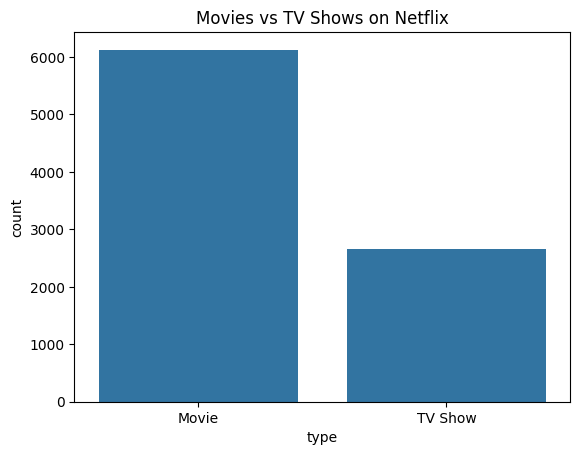

In [15]:
# EDA

# Movies vs TV Shows

sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows on Netflix')
plt.show()



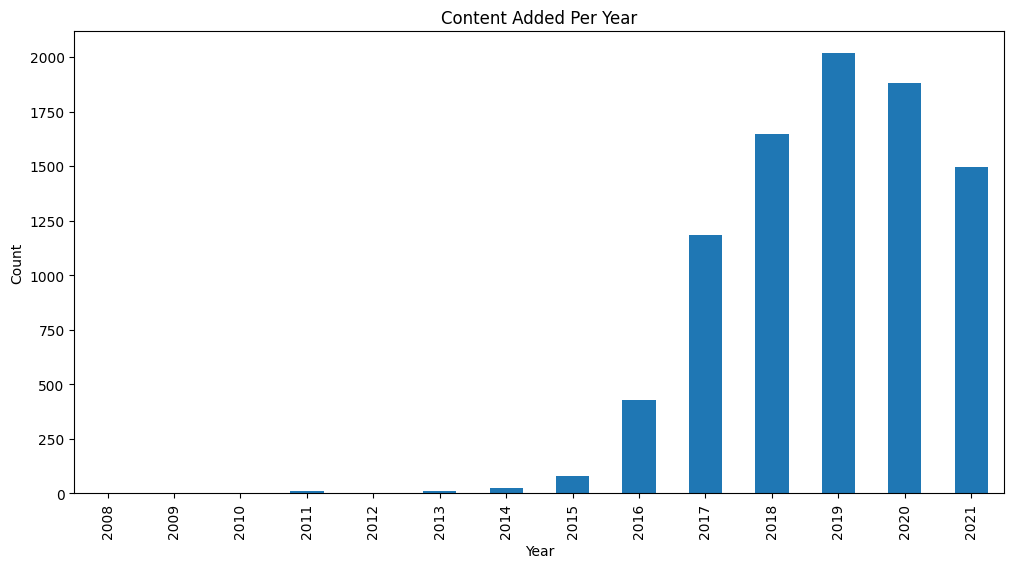

In [17]:
# Content added over the years

df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

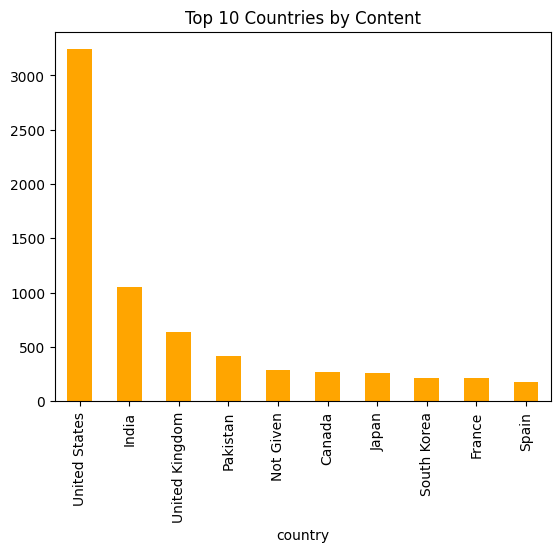

In [25]:
# Top 10 Countries by content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Content')
plt.xticks(rotation=90)
plt.show()

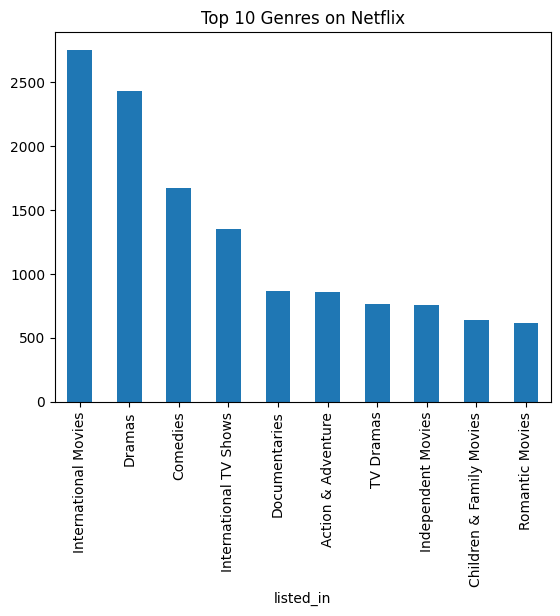

In [29]:
# Top Genres
df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xticks(rotation=90)
plt.show()